In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron


In [4]:
from sklearn.datasets import load_iris 
dataset = load_iris()

In [5]:
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

In [6]:
df['target'] = dataset.target

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
slp = Perceptron(max_iter = 100, eta0=0.1, random_state=42)
slp.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [13]:
ypred = slp.predict(X_test)

In [16]:
#performance metrics
print('accuracy is : ', accuracy_score(y_test, ypred))
print('r2 score is : ', r2_score(y_test, ypred))
print('classification report is : ', classification_report(y_test, ypred))




accuracy is :  0.9
r2 score is :  0.8569157392686804
classification report is :                precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.80      0.89      0.84         9
           2       1.00      0.82      0.90        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



In [17]:
print('confusion_matrix:\n', confusion_matrix(y_test, ypred))

confusion_matrix:
 [[10  0  0]
 [ 1  8  0]
 [ 0  2  9]]


<Axes: >

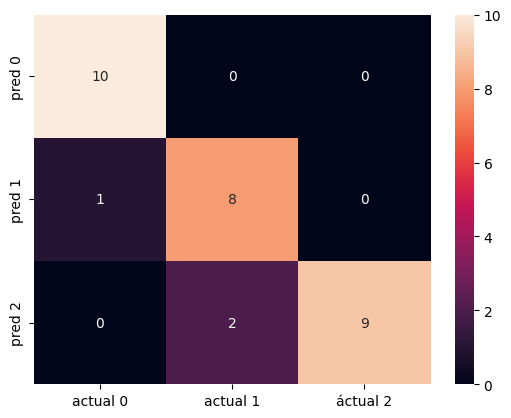

In [19]:
sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, ypred), columns=['actual 0', 'actual 1', 'áctual 2'], index = ['pred 0', 'pred 1', 'pred 2']), annot = True)

In [20]:
#moving on to MLP
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter = 1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [22]:
ypred = mlp.predict(X_test)


In [25]:
#performance metrics
print('accuracy is : ', accuracy_score(y_test, ypred))
print('r2 score is : ', r2_score(y_test, ypred))
print('classification report is : ', classification_report(y_test, ypred))
print('f1 score : ', f1_score(y_test, ypred, average=None))
print('precision score  : ', precision_score(y_test, ypred, average = None))
print('recall score  : ', recall_score(y_test, ypred, average=None))






accuracy is :  0.9
r2 score is :  0.8569157392686804
classification report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      1.00      0.86         9
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30

f1 score :  [1.         0.85714286 0.84210526]
precision score  :  [1.   0.75 1.  ]
recall score  :  [1.         1.         0.72727273]


In [26]:
print('confusion_matrix:\n', confusion_matrix(y_test, ypred))


confusion_matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]


<Axes: >

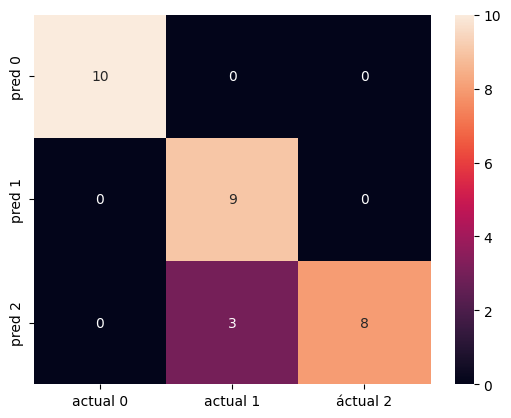

In [27]:
sns.heatmap(data = pd.DataFrame(confusion_matrix(y_test, ypred), columns=['actual 0', 'actual 1', 'áctual 2'], index = ['pred 0', 'pred 1', 'pred 2']), annot = True)
